{'application': 'FasterRCNN_ResNet50_FPN', 'bw': 322271, 'f1': 0.8348498344421387, 'ground_truth_name': 'youtube_videos/cross/dashcam_1_cross_qp_24.mp4', 'pr': 0.8337891101837158, 're': 0.8403750061988831, 'video_name': 'youtube_videos/cross/dashcam_1_cross_compressed_maskgen_dashcam.mp4'}


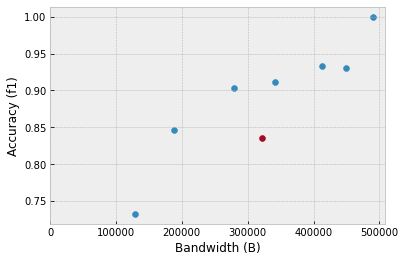

In [6]:

import matplotlib.pyplot as plt
import yaml
with open('stats', 'r') as f:
    data_full = yaml.load(f.read())

plt.style.use('bmh')

video_names = ['cross/dashcam_1_cross']
for i, video_name in enumerate(video_names):
    data = [i for i in data_full if video_name in i['video_name']]
    print(data[-1])
    metric = 'f1'
    
    plt.scatter([i['bw'] for i in data if 'compressed' not  in i['video_name']], [i[metric] for i in data if 'compressed' not in i['video_name']])
    kw = 'maskgen'
    plt.scatter([i['bw'] for i in data if kw  in i['video_name']], [i[metric] for i in data if kw  in i['video_name']])
    #plt.scatter([i['bw'] for i in data if 'full'  in i['video_name']], [i[metric] for i in data if 'full'  in i['video_name']])

    plt.xlim(left=0)
    plt.ylabel('Accuracy (%s)' % metric)
    plt.xlabel('Bandwidth (B)')


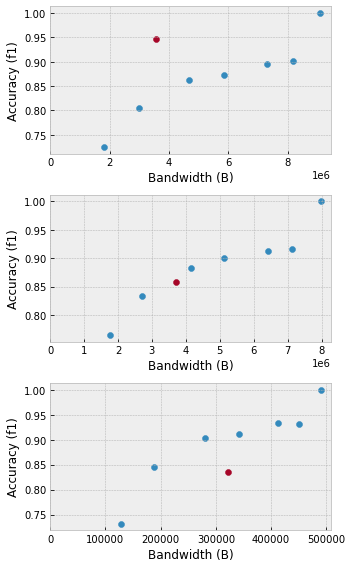

In [11]:
video_names = ['train_first/dashcam_1_train', 'train_last/dashcam_1_train', 'cross/dashcam_1_cross'] 
fig, axs = plt.subplots(len(video_names), figsize=(5, 8))
for i, video_name in enumerate(video_names):
    data = [i for i in data_full if video_name in i['video_name']]
    metric = 'f1'
    
    axs[i].scatter([i['bw'] for i in data if 'compressed' not  in i['video_name']], [i[metric] for i in data if 'compressed' not in i['video_name']])
    kw = 'maskgen'
    axs[i].scatter([i['bw'] for i in data if kw  in i['video_name']], [i[metric] for i in data if kw  in i['video_name']])

    axs[i].set_xlim(left=0)
    axs[i].set_ylabel('Accuracy (%s)' % metric)
    axs[i].set_xlabel('Bandwidth (B)')
fig.tight_layout()


In [38]:
fig.savefig('results_8_videos.jpg', bbox_inches='tight')

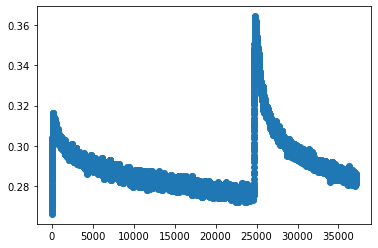

In [1]:
import matplotlib.pyplot as plt
import re

pattern = re.compile('APP loss:([0-9\.]*)')

def smooth(scalars, weight) :  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

with open('train2.log', 'r') as f:
    loss = [float(loss) for loss in pattern.findall(f.read())]

plt.scatter(range(len(loss)), smooth(loss, 0.98))